In [1]:
import pandas as pd

cv_df = pd.read_csv('first_run_cv.csv')

In [3]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_objective', 'param_reg_alpha', 'param_seed', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

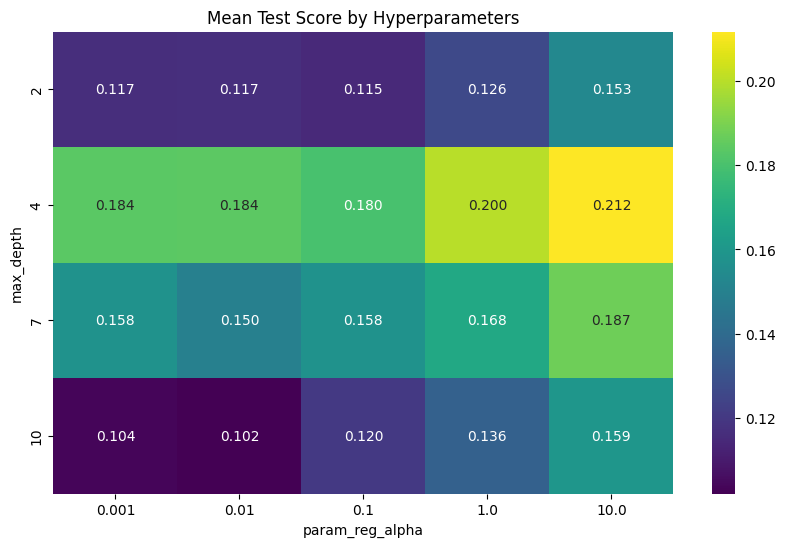

In [52]:
import seaborn as sns
import pandas as pd

# Pivot the dataframe to have n_estimators as columns, max_depth as index, and mean_test_score as values
heatmap_df = cv_df.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_reg_alpha')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.3f', ax=ax)

ax.set_xlabel('param_reg_alpha')
ax.set_ylabel('max_depth')
ax.set_title('Mean Test Score by Hyperparameters')
plt.show()


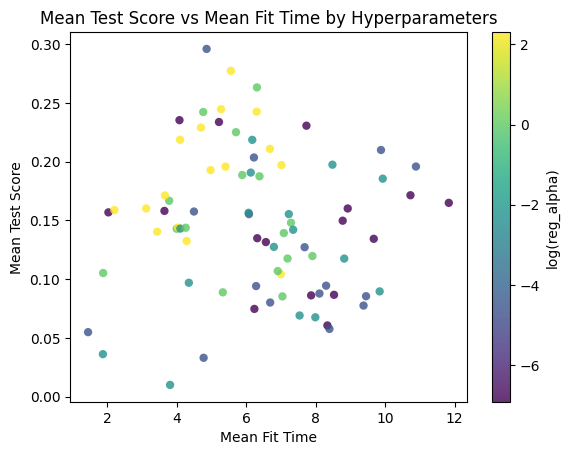

In [11]:
import matplotlib.pyplot as plt
import numpy as np

max_depth_values = cv_df['param_max_depth'].unique()

fig, ax = plt.subplots()

for i, max_depth in enumerate(max_depth_values):
    group = cv_df[cv_df['param_max_depth'] == max_depth]
    fit_time = group['mean_fit_time'].values
    scores = group['mean_test_score'].values
    reg_alpha = group['param_reg_alpha'].values
    colors = plt.cm.viridis(np.linspace(0, 1, len(reg_alpha)))
    jitter_x = np.random.normal(0, 0.05, len(fit_time))
    jitter_y = np.random.normal(0, 0.05, len(fit_time))
    sc = ax.scatter(fit_time + jitter_x, scores + jitter_y, c=np.log(reg_alpha), cmap='viridis', edgecolors='none', alpha=0.8, label=f"max_depth={max_depth}")

ax.set_xlabel('Mean Fit Time')
ax.set_ylabel('Mean Test Score')
ax.set_title('Mean Test Score vs Mean Fit Time by Hyperparameters')
plt.colorbar(sc, label='log(reg_alpha)')
plt.show()


In [16]:
data.dtypes

mean_fit_time          float64
std_fit_time           float64
mean_score_time        float64
std_score_time         float64
param_learning_rate    float64
param_max_depth          int64
param_n_estimators       int64
param_reg_alpha        float64
param_seed               int64
params                  object
split0_test_score      float64
split1_test_score      float64
split2_test_score      float64
split3_test_score      float64
split4_test_score      float64
mean_test_score        float64
std_test_score         float64
rank_test_score          int64
dtype: object

In [22]:
import pandas as pd

# Load cv_df dataframe here
data = cv_df.drop(columns=['param_objective','params','param_learning_rate','param_seed','rank_test_score'])
corr_matrix = data.corr()
print(corr_matrix)


                    mean_fit_time  std_fit_time  mean_score_time   
mean_fit_time            1.000000      0.482132         0.337482  \
std_fit_time             0.482132      1.000000         0.015903   
mean_score_time          0.337482      0.015903         1.000000   
std_score_time          -0.069378     -0.055493         0.742223   
param_max_depth          0.208445     -0.076778         0.198851   
param_n_estimators       0.685363      0.228987         0.012361   
param_reg_alpha         -0.344513     -0.028356        -0.325466   
split0_test_score       -0.080842      0.036300        -0.213267   
split1_test_score       -0.166755      0.015476        -0.207851   
split2_test_score        0.076168      0.040678        -0.053516   
split3_test_score        0.075169      0.027473        -0.014389   
split4_test_score       -0.005876      0.083318        -0.143814   
mean_test_score         -0.023541      0.041383        -0.139465   
std_test_score          -0.066682     -0.003079 

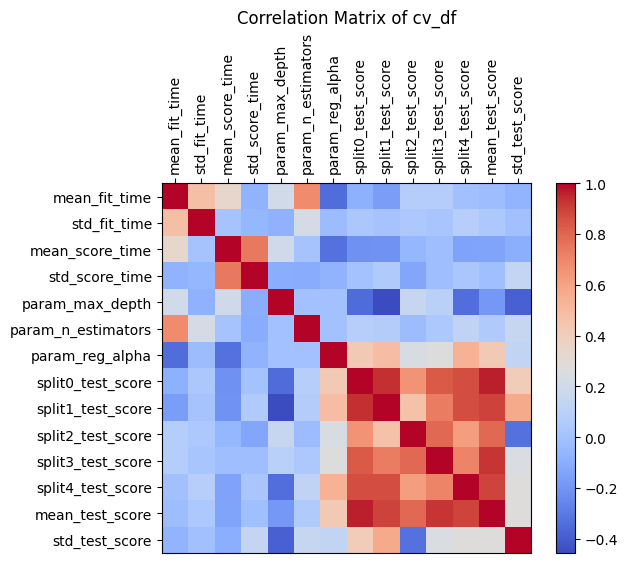

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='coolwarm')

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

plt.colorbar(im)
plt.title("Correlation Matrix of cv_df")
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA

# Load cv_df dataframe here

# Define the two sets of variables to analyze
x_vars = ['mean_fit_time', 'mean_score_time', 'param_learning_rate',
          'param_max_depth', 'param_n_estimators', 'param_reg_alpha']
y_vars = ['split0_test_score', 'split1_test_score', 'split2_test_score',
          'split3_test_score', 'split4_test_score', 'mean_test_score']

# Create two dataframes with the selected variables
x_data = cv_df[x_vars]
y_data = cv_df[y_vars]

# Fit the CCA model
cca = CCA(n_components=1)
cca.fit(x_data, y_data)

# Calculate the canonical correlations
x_canon, y_canon = cca.transform(x_data, y_data)
x_weights = np.linalg.pinv(x_data.values).dot(x_canon)
y_weights = np.linalg.pinv(y_data.values).dot(y_canon)

# Print the canonical correlations and weights
print("Canonical Correlation:", cca.score(x_data, y_data))
print("X Weights:", x_weights)
print("Y Weights:", y_weights)


ImportError: cannot import name 'pinv2' from 'scipy.linalg' (/home/nolan/miniconda3/envs/kaggle-amp/lib/python3.9/site-packages/scipy/linalg/__init__.py)